In [334]:
import numpy as np
import matplotlib.pyplot as plt

# Simple Harmonic Oscillator

In this notebook, we numericlly solve the motion of a simple harmonic oscillator, using our own IVP solver `mysolver.py`.
Import it by `import mysolver as solver`.

In [335]:
import mysolver as solver

In the solver, we have to define the function to solve, i.e. define y' = f(t,y).

In [336]:
def oscillator(t,y,K,M):
        """
        The derivate function for an oscillator
        In this example, we set

        y[0] = x
        y[1] = v

        yderive[0] = x' = v
        yderive[1] = v' = a

        :param t: the time
        :param y: the input values
        :param K: the spring constant
        :param M: the mass of the oscillator

        """

        yderive = np.zeros(len(y))
        yderive[0] = y[1]
        yderive[1] = -K/M*y[0]
 
        return yderive

Start from a large time step (50 steps) to compare different integration method.

Let's assume the inital location of the oscillator is located at x = 1.0 (`A=1` and `y=[1,0]`).\
Assume the spring constant `K=1` and the mass of the oscillator `M=1`. 

Simulate the motion of the oscilator from time `t=0` upto `t=20` seconds.  

In [337]:
A = 1 # the initial amplitude
K = 1 # the spring constant
M = 1 # the mass of the 

t_span = (0, 20)
y0     = np.array([A,0])
t_eval = np.linspace(0,20,50)

Now, let's solve this IVP with different numerical schemes:

Euler's meothd:

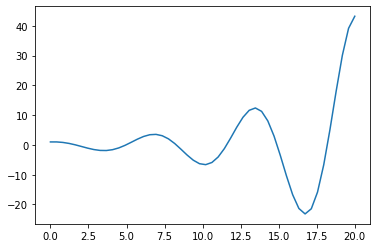

In [338]:
sol_Euler = solver.solve_ivp(oscillator, t_span, y0, method="Euler",t_eval=t_eval, args=(K,M))
plt.plot(t_eval,sol_Euler[0],label="Euler")

Runge-Kutta 2:

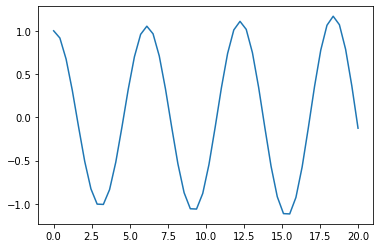

In [339]:
sol_RK2 = solver.solve_ivp(oscillator, t_span, y0, method="RK2",t_eval=t_eval, args=(K,M))
plt.plot(t_eval,sol_RK2[0],label="RK2")

Runge-Kutta 4:

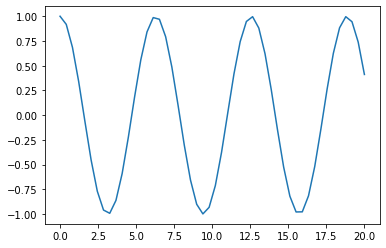

In [340]:
sol_RK4 = solver.solve_ivp(oscillator, t_span, y0, method="RK4",t_eval=t_eval, args=(K,M))
plt.plot(t_eval,sol_RK4[0],label="RK4")

### Analytical solution

For a simple harmonic oscillator, we know the analytical soltions.

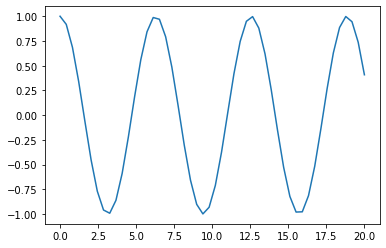

In [341]:
plt.plot(t_eval, np.cos(t_eval), label='Analytical')

Visualize the numerical and analytical solutions.

Check both the position and velocity.

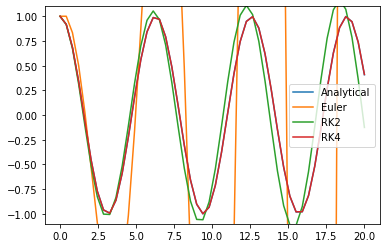

In [342]:
plt.plot(t_eval, np.cos(t_eval), label='Analytical')
plt.plot(t_eval, sol_Euler[0], label='Euler')
plt.plot(t_eval, sol_RK2[0], label='RK2')
plt.plot(t_eval, sol_RK4[0], label='RK4')
plt.ylim(-1.1, 1.1)
plt.legend()

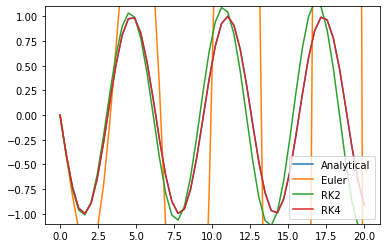

In [343]:
plt.plot(t_eval, -np.sin(t_eval), label='Analytical')
plt.plot(t_eval, sol_Euler[1], label='Euler')
plt.plot(t_eval, sol_RK2[1], label='RK2')
plt.plot(t_eval, sol_RK4[1], label='RK4')
plt.ylim(-1.1, 1.1)
plt.legend()

Now, repeat the calculations with different time steps. See how solution converged.\
Does your solutions close to the analytical solutions?\ 
If yes, how small the time step with each numerical method?\
If not, why?  

### Energy Conservation

In addition to comparing with the analyical solutions, we could check the energy conservation as well.

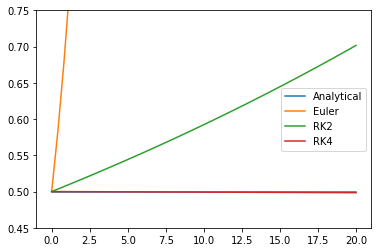

In [344]:
plt.plot(t_eval, K*np.cos(t_eval)**2/2+M*(np.sin(t_eval))**2/2, label='Analytical')
plt.plot(t_eval, K*sol_Euler[0]**2/2+M*(sol_Euler[1])**2/2, label='Euler')
plt.plot(t_eval, K*sol_RK2[0]**2/2+M*(sol_RK2[1])**2/2, label='RK2')
plt.plot(t_eval, K*sol_RK4[0]**2/2+M*(sol_RK4[1])**2/2, label='RK4')
plt.ylim(0.45, 0.75)
plt.legend()

Also, comput the numerical errors

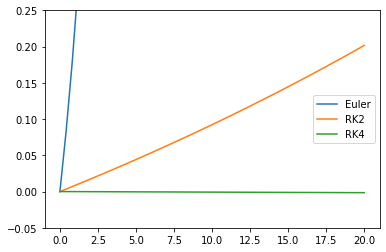

In [345]:
plt.plot(t_eval, K*sol_Euler[0]**2/2+M*(sol_Euler[1])**2/2-K*np.cos(t_eval)**2/2-M*(np.sin(t_eval))**2/2, label='Euler')
plt.plot(t_eval, K*sol_RK2[0]**2/2+M*(sol_RK2[1])**2/2-K*np.cos(t_eval)**2/2-M*(np.sin(t_eval))**2/2, label='RK2')
plt.plot(t_eval, K*sol_RK4[0]**2/2+M*(sol_RK4[1])**2/2-K*np.cos(t_eval)**2/2-M*(np.sin(t_eval))**2/2, label='RK4')
plt.ylim(-0.05, 0.25)
plt.legend()

# Performance

How fast is your calculation?

In a reference calculation which I use 10^5 steps to integrate the IVP from `t =0` to `t=50` with `method="RK4"`.
A reference value using the `%timeit` function gives

`1.37 s ± 16.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)`

and the same iteration with `method="Euler"`,

`310 ms ± 4.67 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)`

In [347]:
t_eval = np.linspace(0,20,100000)

In [348]:
%timeit solver.solve_ivp(oscillator, t_span, y0, method="Euler",t_eval=t_eval, args=(K,M))
%timeit solver.solve_ivp(oscillator, t_span, y0, method="RK4",t_eval=t_eval, args=(K,M))

783 ms ± 15.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.06 s ± 64.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
